Names:  
1) Klaus Kades (Uni-id: fw448 Matrikelnr.: 3408463)

2) Lucas-Raphael Müller (Uni-id: al413 Matrikelnr.: 3205638)

3) Melanie Schellenberg (Uni-id: qh400 Matrikelnr.: 3146390)

4) Shuhan Xiao (Uni-id: kg410 Matrikelnr.: 3160697)

In [60]:
import pandas as pd 
import networkx as nx 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np
!pip install python-igraph
import igraph as ig
from scipy.special import zeta

# Assignment 4
## Problem 4-1 Power Laws

In [2]:
Kmax = 10
degrees = [16, 17, 10, 26, 13, 14, 28, 45, 10, 12, 12, 10, 136, 16, 25, 36, 12, 14, 22, 10]
n = len(degrees)

In [3]:
gamma = 1+n/(sum([np.log(i/(Kmax-1/2)) for i in degrees]))
print(f"estimated exponent {gamma}")

estimated exponent 2.5309557576080417


In [4]:
sigma = (gamma - 1)/np.sqrt(n)
print(f"error of estimation {sigma}")

error of estimation 0.34233211445562717


## Problem 4-2
3.
* average_k = Divide[1,Zeta\(40)2.3\(41)]Sum[Power[k,1-2.3],{k,1,1000}]

* average_k_of_neighbors = Divide[1,Sum[Power[l,1-2.3],{l,1,1000}]]Sum[Power[k,2-2.3],{k,1,1000}]

## Problem 4-3 Network Measures of Real Graphs 

Load Facebook network of New Orleans.

In [5]:
!wget http://socialnetworks.mpi-sws.mpg.de/data/facebook-links.txt.gz --no-clobber

--2021-11-22 19:09:13--  http://socialnetworks.mpi-sws.mpg.de/data/facebook-links.txt.gz
Resolving www-int2 (www-int2)... 193.174.53.221, 193.174.53.86
Connecting to www-int2 (www-int2)|193.174.53.221|:3128... connected.
Proxy request sent, awaiting response... 301 Moved Permanently
Location: http://socialnetworks.mpi-sws.org/data/facebook-links.txt.gz [following]
--2021-11-22 19:09:13--  http://socialnetworks.mpi-sws.org/data/facebook-links.txt.gz
Reusing existing connection to www-int2:3128.
Proxy request sent, awaiting response... 200 OK
Length: 10429299 (9,9M) [application/x-gzip]
Saving to: ‘facebook-links.txt.gz’

facebook-links.txt. 100%[===================>]   9,95M  --.-KB/s    in 0,1s    

2021-11-22 19:09:14 (69,6 MB/s) - ‘facebook-links.txt.gz’ saved [10429299/10429299]



In [6]:
!gzip -d *.gz
!ls

 Complex-Network-Analysis-Exercises		 FAOSTAT_data_11-2-2021.csv
 Copy_of_Problem_1_4.ipynb			 Problem_2_3.ipynb
'Copy of Problem-1-4.ipynb - Colaboratory.pdf'	 Problem_4_1_4_3.ipynb
 facebook-links.txt


In [2]:
data = pd.read_csv('./facebook-links.txt', sep='\t', index_col=None, names=['source','target','time-stamp'])

display(data)

,source,target,time-stamp
0,1,2,\N
1,1,3,\N
2,1,4,\N
3,1,5,\N
4,1,6,\N
...,...,...,...
1545681,21169,12888,1201988286
1545682,21169,18660,1214804215
1545683,48809,24065,1210066726
1545684,48809,29258,1206011811


### Cleaning data

In [3]:
# remove time-stamp column
data = data.drop(columns=['time-stamp'])
display(data.head())

,source,target
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [4]:
# remove parallel edges by removing duplicate rows
display(data)
data = data.drop_duplicates(keep='first')


,source,target
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6
...,...,...
1545681,21169,12888
1545682,21169,18660
1545683,48809,24065
1545684,48809,29258


In [5]:
data['edge'] = data.apply(lambda y: tuple(sorted((y.source, y.target))), axis=1)
data = data.drop_duplicates('edge',keep='first')
display(data)

,source,target,edge
0,1,2,"(1, 2)"
1,1,3,"(1, 3)"
2,1,4,"(1, 4)"
3,1,5,"(1, 5)"
4,1,6,"(1, 6)"
...,...,...,...
1545556,31971,13390,"(13390, 31971)"
1545643,18751,19389,"(18751, 19389)"
1545650,18751,27762,"(18751, 27762)"
1545654,18751,17546,"(17546, 18751)"


In [11]:
G = nx.from_pandas_edgelist(data, source='source',target='target')
print(nx.info(G))

# convert to undirected graph
G = G.to_undirected()

Graph with 63731 nodes and 817090 edges


### 1. diameter of the largest component

In [15]:
largest_cc = max(nx.connected_components(G), key=len)
G0 = G.subgraph(largest_cc)

In [16]:
#convert to igraph
H0 = ig.Graph.from_networkx(G0)

In [17]:
print(G0)

Graph with 63392 nodes and 816886 edges


In [18]:
print(H0.diameter())

15


In [6]:
H = ig.Graph.TupleList(data[["source","target"]].itertuples(index=False),
                           directed=False)

In [7]:
H.summary()

'IGRAPH UN-- 63731 817090 -- \n+ attr: name (v)'

In [8]:
H.diameter()

15

### 2. ID of node with the highest degree

In [ ]:
ids = [i[0] for i in G.degree()]
degrees = [i[1] for i in G.degree()]

print(f"max degree: {max(degrees)}, id: {ids[np.argmax(degrees)]}")
print(G.degree(2332))

max degree: 1098, id: 2332
1098


### 3. number of triangles

In [54]:
n_triangles = len(nx.triangles(G))
#divide by three as each triangle is counted three times

In [55]:
print(n_triangles)

63731


### 4. global or average local clustering coefficient

In [56]:
c = nx.average_clustering(G)
print(c)

0.22099367691190397


### 5. power-law exponent

In [307]:
N = G.number_of_nodes()
print(N)

63731


Text(0, 0.5, 'Frequency')

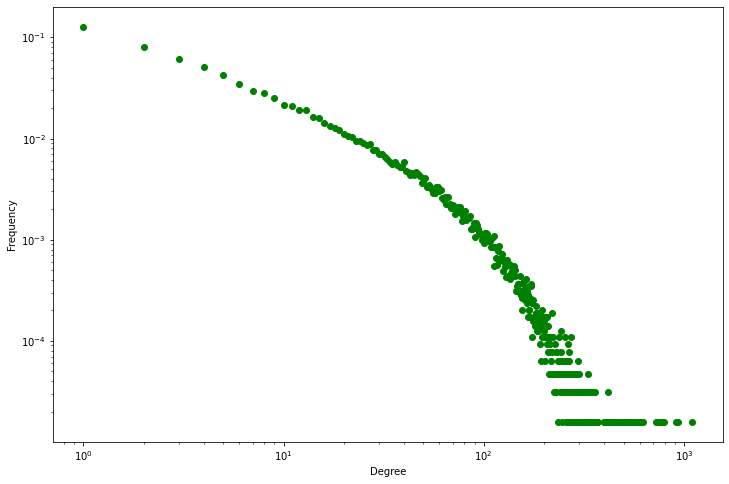

In [385]:
degree_freq = nx.degree_histogram(G)

deg = range(len(degree_freq))
plt.figure(figsize=(12, 8)) 
plt.loglog(deg, np.array(degree_freq)/N,'go') 
#plt.loglog(np.arange(min(degrees),max(degrees))**(-1.5)/zeta(1.5,2))
plt.xlabel('Degree')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Cumulative Degree Distribution')

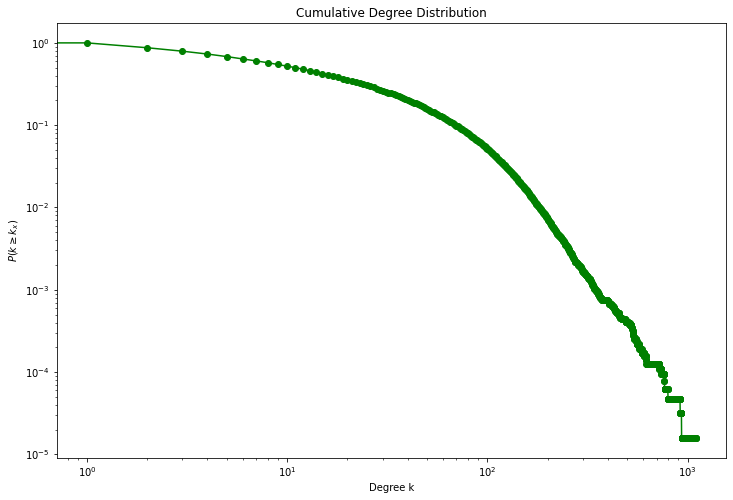

In [362]:
cum_degree_freq = np.cumsum(degree_freq[::-1])[::-1]/N
plt.figure(figsize=(12, 8))  
plt.loglog(deg, cum_degree_freq,'go-')  
plt.xlabel('Degree k') 
plt.ylabel('$P(k \geq k_x)$') 
plt.title("Cumulative Degree Distribution")



In [136]:
max(degrees)

1098

Text(0, 0.5, 'freq')

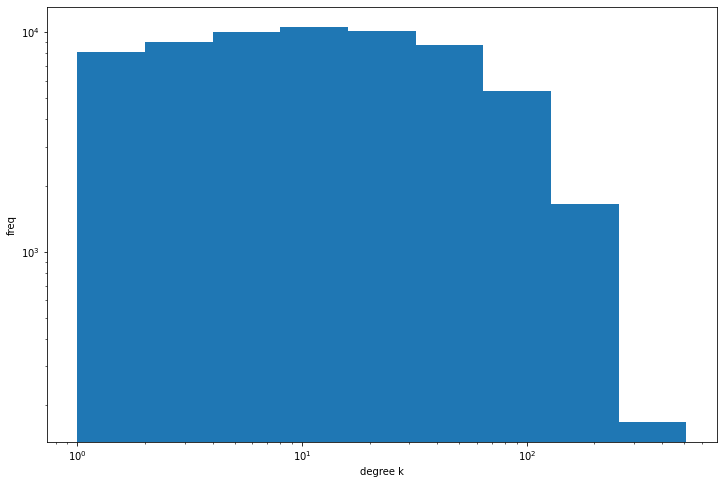

In [131]:
c = 2
max_bin = int(np.log(max(degrees))/np.log(c))
plt.figure(figsize=(12, 8))
plt.hist(degrees, bins=[c**(n) for n in range(max_bin)])
plt.xscale('log')    
plt.yscale('log') 
plt.xlabel('degree k')
plt.ylabel('freq')

In [475]:
gammas = []
D = []
kmax = 1000
deg = np.arange(len(degree_freq))
degrees = np.array(degrees)
for kmin in range(min(degrees),kmax):
    n = np.sum(degrees>kmin)
    gamma = 1 + n/np.sum(np.log(degrees[degrees>kmin]/(kmin-1/2)))
    gammas.append(gamma)
    # Kolmogorov-Smirnov Test
    Sk = cum_degree_freq[kmin:]/N
    Pk = np.array(1-zeta(gamma,deg[kmin:])/zeta(gamma,kmin))
    D.append(np.max(np.abs(Sk-Pk)))

Text(0, 0.5, 'D')

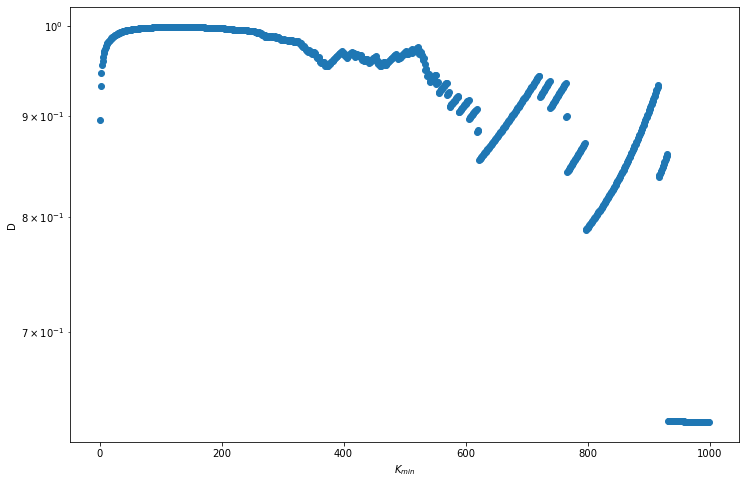

In [476]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(min(degrees),kmax),D,"o")
plt.yscale('log')
plt.xlabel("$K_{min}$")
plt.ylabel("D")


In [478]:
idx_min = 0
idx_max = 500
krange = np.arange(min(degrees),kmax)[idx_min:idx_max]
kmin = krange[np.argmin(D[idx_min:idx_max])]
print(kmin)
n = np.sum(degrees>kmin)
gamma = 1 + n/np.sum(np.log(degrees[degrees>kmin]/(kmin-1/2)))
print(gamma)

1
1.299489881008809


In [447]:
gamma = 2.2
kmin = 10

kmin = 2???

In [402]:
np.sum(degree_freq/N)

0.9999999999999999

In [302]:
gammas[1]

1.525154602434773

### 6. Plot Original Degree distribution

1
1.299489881008809


Text(0, 0.5, 'Frequency')

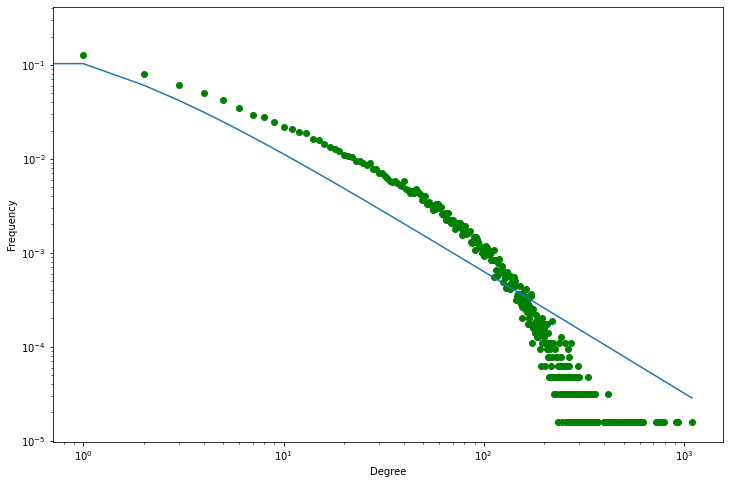

In [482]:
idx_min = 0
idx_max = 100
krange = np.arange(min(degrees),kmax)[idx_min:idx_max]
kmin = krange[np.argmin(D[idx_min:idx_max])]
print(kmin)
n = np.sum(degrees>kmin)
gamma = 1 + n/np.sum(np.log(degrees[degrees>kmin]/(kmin-1/2)))
print(gamma)
plt.figure(figsize=(12, 8)) 
plt.loglog(deg, np.array(degree_freq)/N,'go') 
plt.loglog((np.arange(min(degrees),max(degrees))**(-gamma))/zeta(gamma,kmin))
plt.xlabel('Degree')
plt.ylabel('Frequency')

373
3.8462506216893666


Text(0, 0.5, 'Frequency')

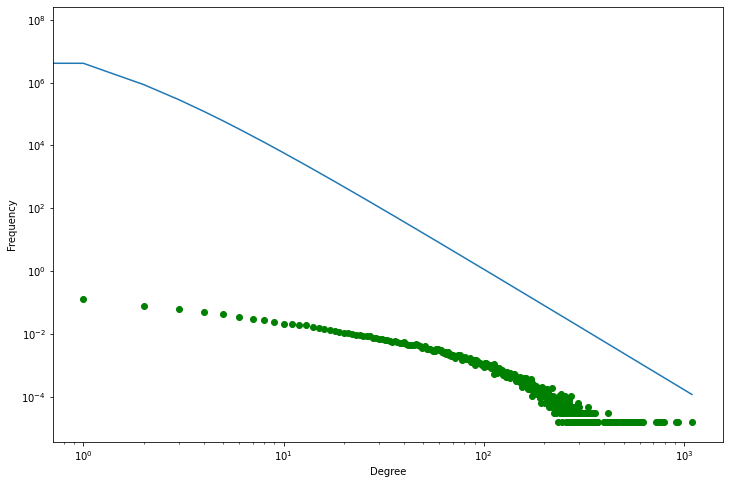

In [489]:
idx_min = 10
idx_max = 400
krange = np.arange(min(degrees),kmax)[idx_min:idx_max]
kmin = krange[np.argmin(D[idx_min:idx_max])]
print(kmin)
n = np.sum(degrees>kmin)
gamma = 1 + n/np.sum(np.log(degrees[degrees>kmin]/(kmin-1/2)))
print(gamma)
plt.figure(figsize=(12, 8)) 
plt.loglog(deg, np.array(degree_freq)/N,'go') 
plt.loglog((np.arange(min(degrees),max(degrees))**(-gamma))/(zeta(gamma,kmin)))
plt.xlabel('Degree')
plt.ylabel('Frequency')

797
5.846491258806066


Text(0, 0.5, 'Frequency')

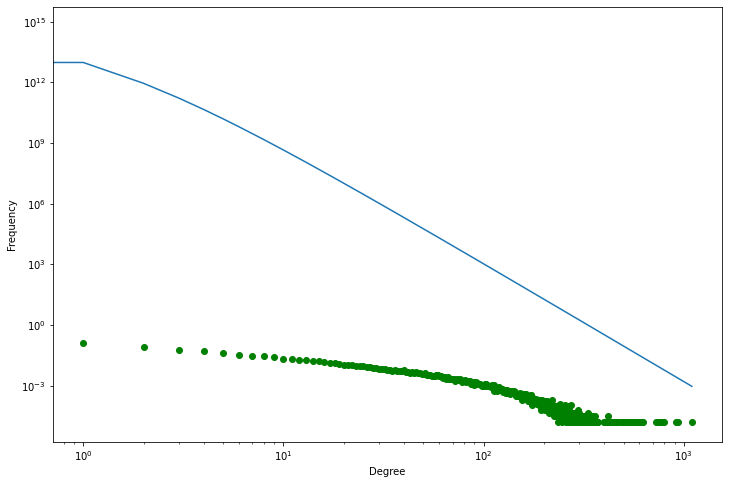

In [491]:
idx_min = 400
idx_max = 800
krange = np.arange(min(degrees),kmax)[idx_min:idx_max]
kmin = krange[np.argmin(D[idx_min:idx_max])]
print(kmin)
n = np.sum(degrees>kmin)
gamma = 1 + n/np.sum(np.log(degrees[degrees>kmin]/(kmin-1/2)))
print(gamma)
plt.figure(figsize=(12, 8)) 
plt.loglog(deg, np.array(degree_freq)/N,'go') 
plt.loglog((np.arange(min(degrees),max(degrees))**(-gamma))/(zeta(gamma,kmin)))
plt.xlabel('Degree')
plt.ylabel('Frequency')